[0.0011219  0.02077239]
[1.00175345e-03 4.17619041e-02 1.39080583e-05]
[1.20171766e-03 4.78415041e+01 1.96992168e+00]
0.8929063402151712
1.0711431154148399
t0=1.9699216770764691


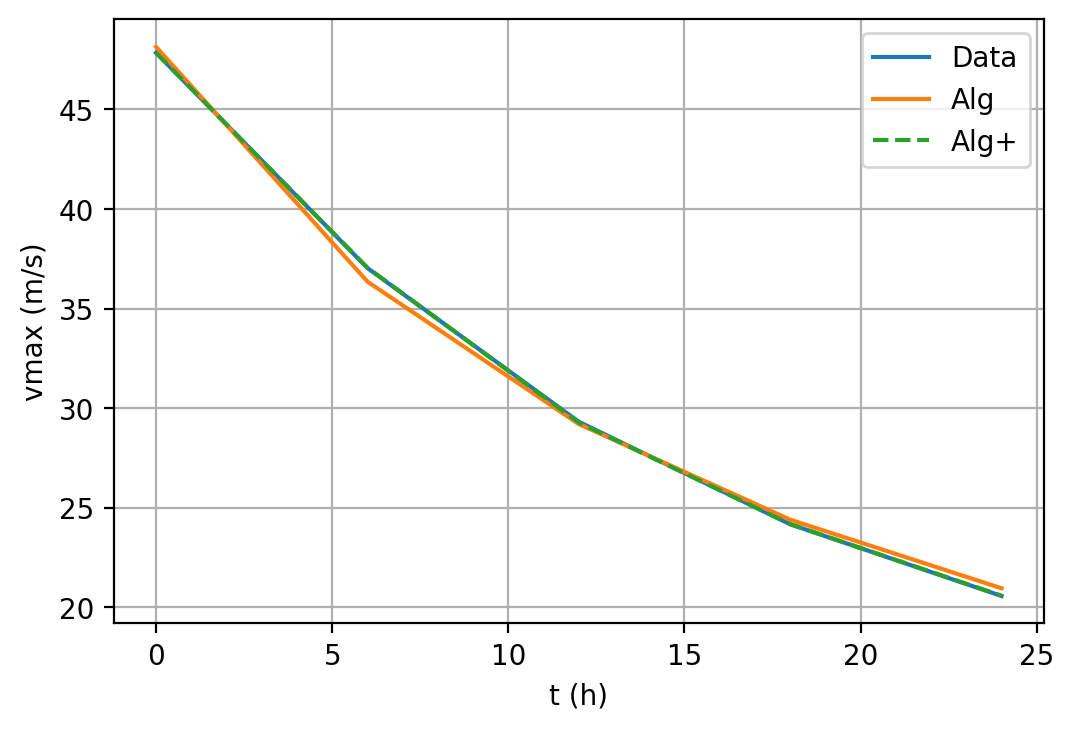

In [45]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

def algd(x,k,a):
    return(1/(k*x+a))

def algd_kl(x,k0,a,b):
    return(2/(x*(b*x+2*k0)+a))

def algd_k2(t,k0,v0,t0):
    C=(1/v0-t0*k0/2)
    return(1/(k0*(t+(t0/2)*np.exp(-t/t0))+C))
    
                            
ydata =[47.843292,37.039968,29.323308,24.178868,20.577760] # example data (irma 2017)
xdata = np.array([0,6,12,18,24]) # *3600 #(convert to seconds)

# ydata =[47.843292,37.039968,29.323308,24.178868,20.577760] # example data  
# xdata = np.array([0,6,12,18,24])*3600 #(convert to seconds)
# pb0=[4e-7,50,12*3600] 

pa0=[0.001,0.02]
fita,fitcova=curve_fit(algd,xdata,ydata,p0=pa0)

pb0=[0.001,0.02,0]
fitb,fitcovb=curve_fit(algd_kl,xdata,ydata,p0=pb0)
           
# pb0=[0.001,50,0.0001]
pc0=[0.001,50,10] 
fitc,fitcovc=curve_fit(algd_k2,xdata,ydata,p0=pc0)
              

print(fita)
print(fitb)
print(fitc)
print(fitb[0]/fita[0])
print(fitc[0]/fita[0])
print('t0=' + str(fitc[2]))

fig,ax=plt.subplots(1,1,dpi=200,figsize=(6,4))        
ax.plot(xdata,ydata)
ax.plot(xdata,algd(xdata,fita[0],fita[1]))
# ax.plot(xdata,algd_kl(xdata,fitb[0],fitb[1],fitb[2]))
ax.plot(xdata,algd_k2(xdata,fitc[0],fitc[1],fitc[2]),'--')
             
ax.grid(True)
ax.set_xlabel('t (h)')
ax.set_ylabel('vmax (m/s)')
ax.legend(('Data','Alg','Alg+','Alg++'));